In [24]:
import torchaudio
import torchaudio.transforms as T
from utils import *

AudioMetaData(sample_rate=44100, num_frames=8804736, num_channels=2, bits_per_sample=0, encoding=MP3)
torch.Size([2, 8804736])
199.6538775510204
torch.Size([2, 1014300])
Sample Rate: 44100
Shape: (2, 1014300)
Dtype: torch.float32
 - Max:      0.492
 - Min:     -0.500
 - Mean:    -0.004
 - Std Dev:  0.074

tensor([[-0.0531, -0.0519, -0.0585,  ..., -0.0005, -0.0013, -0.0024],
        [-0.0545, -0.0529, -0.0594,  ..., -0.0006, -0.0014, -0.0025]])



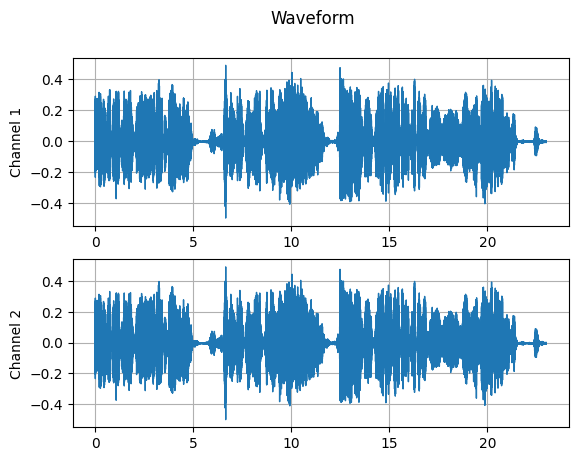

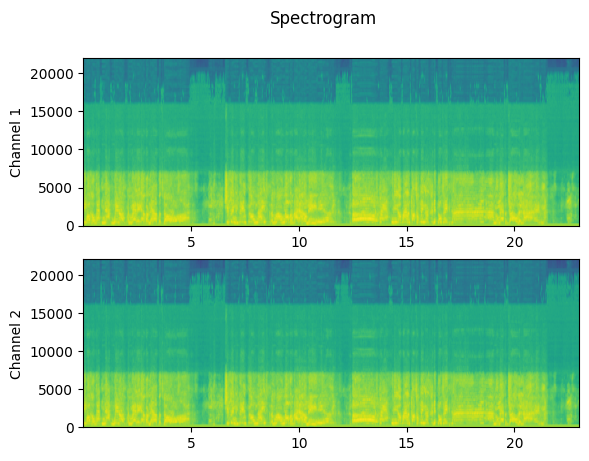

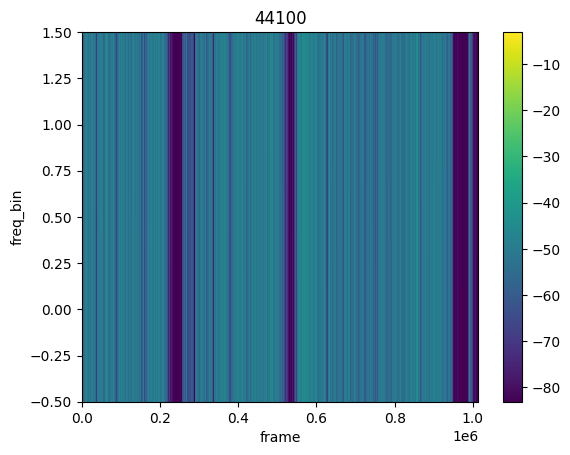

torch.Size([2, 500, 5072])


/home/jack/miniconda3/envs/dlmag/lib/python3.10/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (500) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


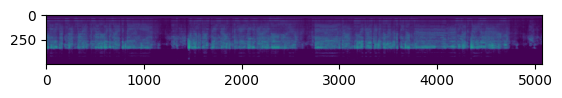

In [42]:
SAMPLE_WAV_PATH = '../artist20_testing_data/0001.wav'
SAMPLE_WAV_PATH = '/home/jack/Code/HW/dlmag-hw1/data/separated/train/aerosmith/V_01-Draw_the_Line.mp3'
metadata = torchaudio.info(SAMPLE_WAV_PATH)
print(metadata)

waveform, sample_rate = torchaudio.load(SAMPLE_WAV_PATH, normalize=True)

print(waveform.shape)
print(waveform.shape[1]/sample_rate)

ss = 57
es = 80
subWave = waveform[:,sample_rate*ss:sample_rate*es]
print(subWave.shape)

print_stats(subWave, sample_rate=sample_rate)
plot_waveform(subWave, sample_rate)
plot_specgram(subWave, sample_rate)
plot_spectrogram(subWave, sample_rate)
play_audio(subWave, sample_rate)

# mel
transform = T.MelSpectrogram(sample_rate=sample_rate, n_mels=500)
mel_specgram = transform(subWave)  # (channel, n_mels, time)
print(mel_specgram.shape)
plt.imshow(librosa.power_to_db(mel_specgram[0]))
plt.show()

In [5]:
with open('../data_path/train.txt') as f:
    train = f.read().split()
train = [i.split(',') for i in train]

with open('../data_path/validation.txt') as f:
    valid = f.read().split()
valid = [i.split(',') for i in valid]

In [11]:
train[0]

['/home/jack/Code/HW/dlmag-hw1/artist20/mp3s-32k/beatles/A_Hard_Day_s_Night/04-I_m_Happy_Just_To_Dance_With_You.mp3',
 'beatles',
 '04-I_m_Happy_Just_To_Dance_With_You']

In [ ]:
import tqdm
import demucs.separate

for l in [train, valid]:
    for track in tqdm.tqdm(l):
        demucs.separate.main(["--mp3", "--two-stems", "vocals", track[0]])

# =====

/home/jack/miniconda3/envs/dlmag/lib/python3.10/site-packages/torchaudio/functional/functional.py:576: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (257) may be set too low.
  warnings.warn(


Shape: (2, 8804736)
Dtype: torch.float32
 - Max:      0.577
 - Min:     -0.557
 - Mean:    -0.004
 - Std Dev:  0.049

tensor([[ 0.0000e+00,  1.5837e-11,  1.2778e-11,  ...,  4.4411e-06,
          3.6714e-06,  2.8494e-06],
        [ 0.0000e+00,  1.4603e-11,  3.7301e-12,  ..., -1.8794e-06,
         -2.0675e-06, -2.1511e-06]])



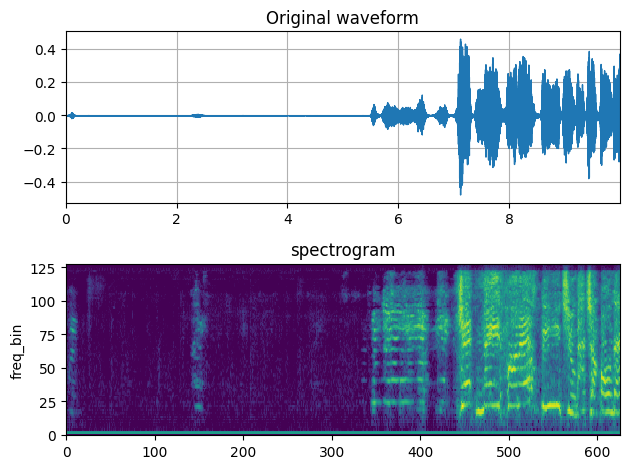

In [64]:
SAMPLE_WAV_PATH = '/home/jack/Code/HW/dlmag-hw1/data/separated/train/aerosmith/V_01-Draw_the_Line.mp3'

# Load audio
SPEECH_WAVEFORM, SAMPLE_RATE = torchaudio.load(SAMPLE_WAV_PATH)

# Define transform
resample = T.Resample(SAMPLE_RATE, 16000)
spectrogram = T.MelSpectrogram(n_fft=512)

# Perform transform
spec = spectrogram(resample(SPEECH_WAVEFORM[:,SAMPLE_RATE*10:SAMPLE_RATE*20]))

fig, axs = plt.subplots(2, 1)
print_stats(SPEECH_WAVEFORM)
plot_waveform(SPEECH_WAVEFORM[:,SAMPLE_RATE*10:SAMPLE_RATE*20], SAMPLE_RATE, title="Original waveform", ax=axs[0])
plot_spectrogram(spec[0], title="spectrogram", ax=axs[1])
fig.tight_layout()